In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
machine = pd.read_csv('D:\\24 - Machine_Learning\\download files\\machine.data', sep=",")
machine

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
machine.isnull()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False


In [4]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   adviser  208 non-null    object
 1   32/60    208 non-null    object
 2   125      208 non-null    int64 
 3   256      208 non-null    int64 
 4   6000     208 non-null    int64 
 5   256.1    208 non-null    int64 
 6   16       208 non-null    int64 
 7   128      208 non-null    int64 
 8   198      208 non-null    int64 
 9   199      208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [5]:
machine.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
machine.shape

(208, 10)

In [7]:
col_names = ['modelname', 'vendorname', 'MYCT', 'MINMAIN', 'MAXMAIN', 'CACHE', 'CACHEMAX', 'CACHEMIN', 'PRP', 'ERP']

In [8]:
machine.columns = col_names

<AxesSubplot:>

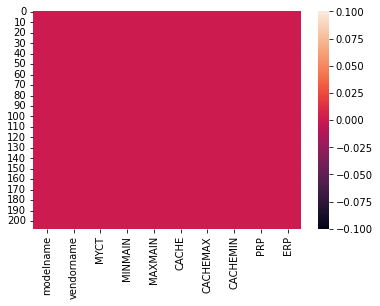

In [9]:
sns.heatmap(machine.isnull())

<AxesSubplot:>

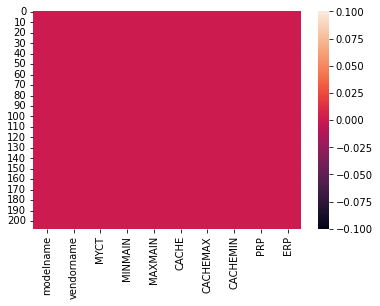

In [10]:
sns.heatmap(machine.isna())

<AxesSubplot:>

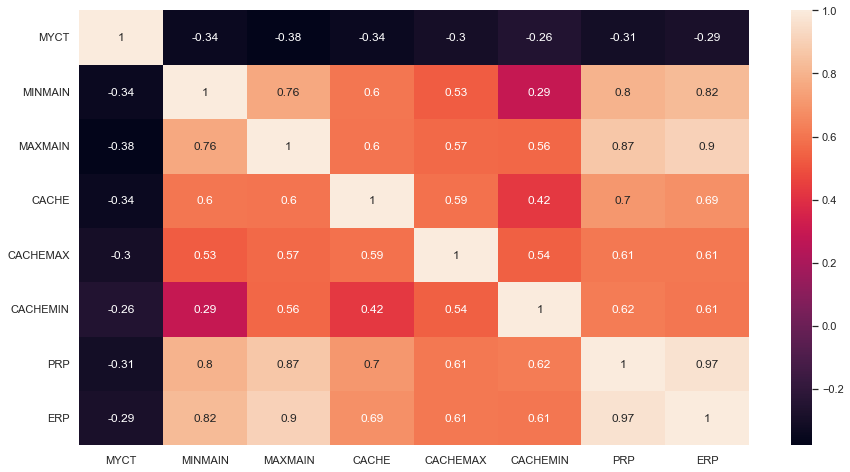

In [11]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(machine.corr(), annot=True)

In [12]:
# All attributes and feature are highly correlated with ERP, whereas machine cycle time in nanoseconds is negatively correlated

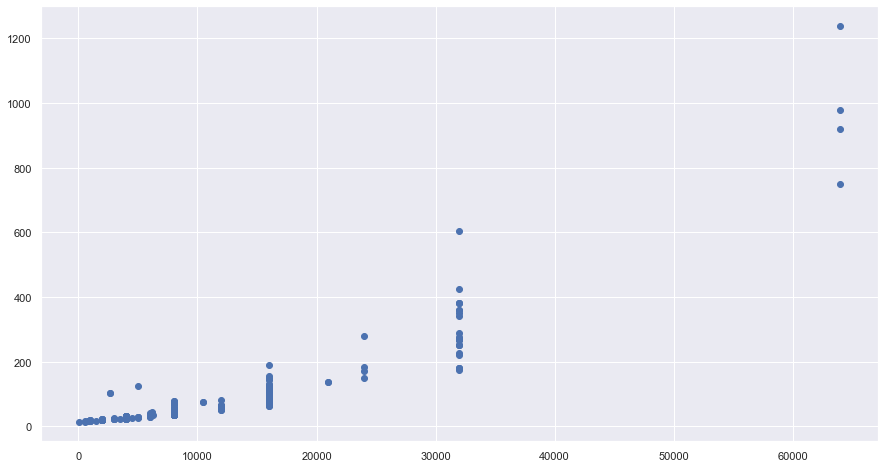

In [13]:
plt.scatter(machine.MAXMAIN, machine.ERP)

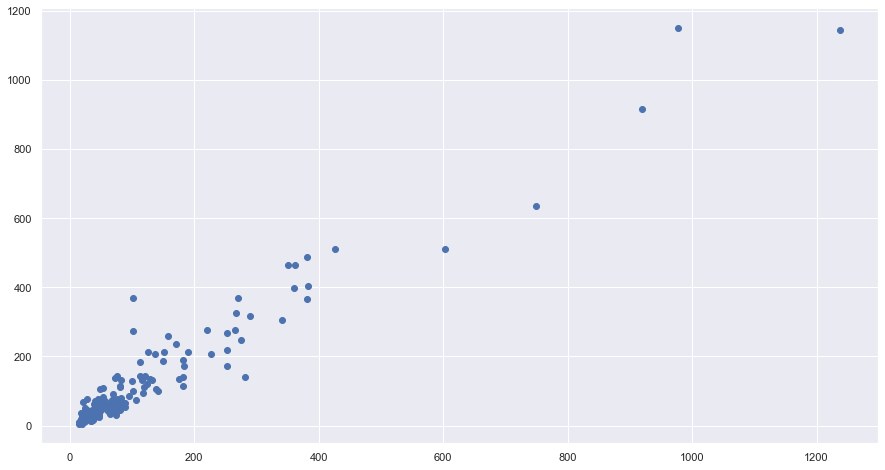

In [14]:
plt.scatter(machine.ERP, machine.PRP)

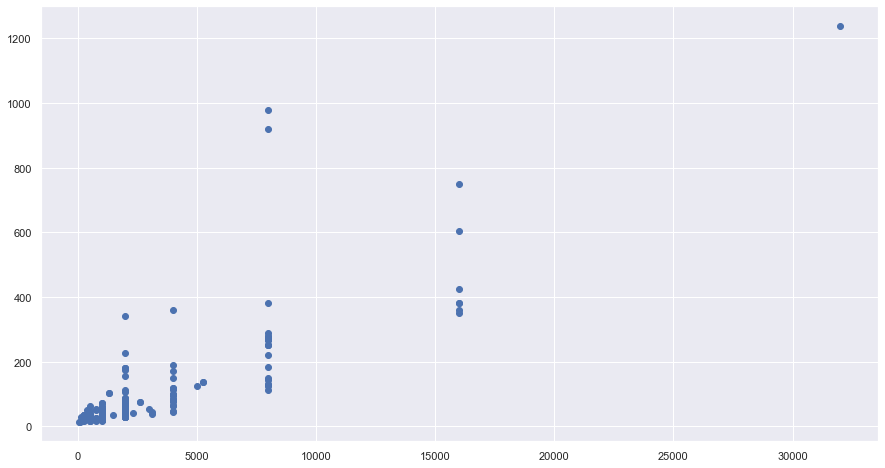

In [15]:
plt.scatter(machine.MINMAIN, machine.ERP)

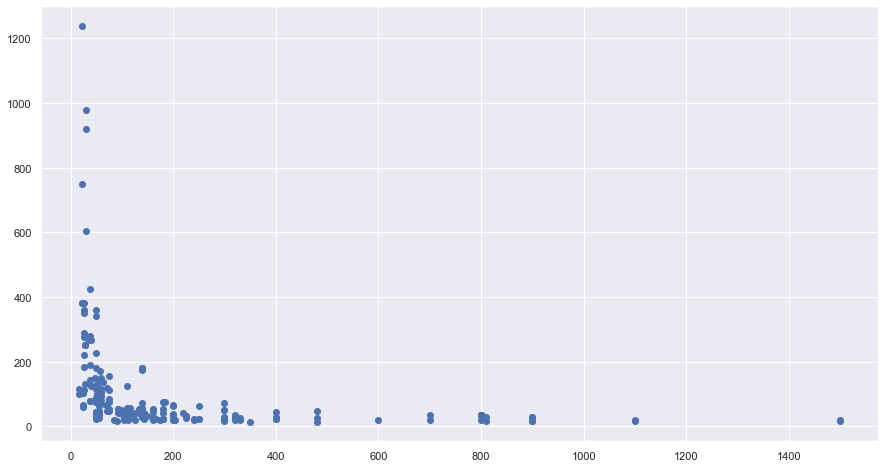

In [16]:
plt.scatter(machine.MYCT, machine.ERP)

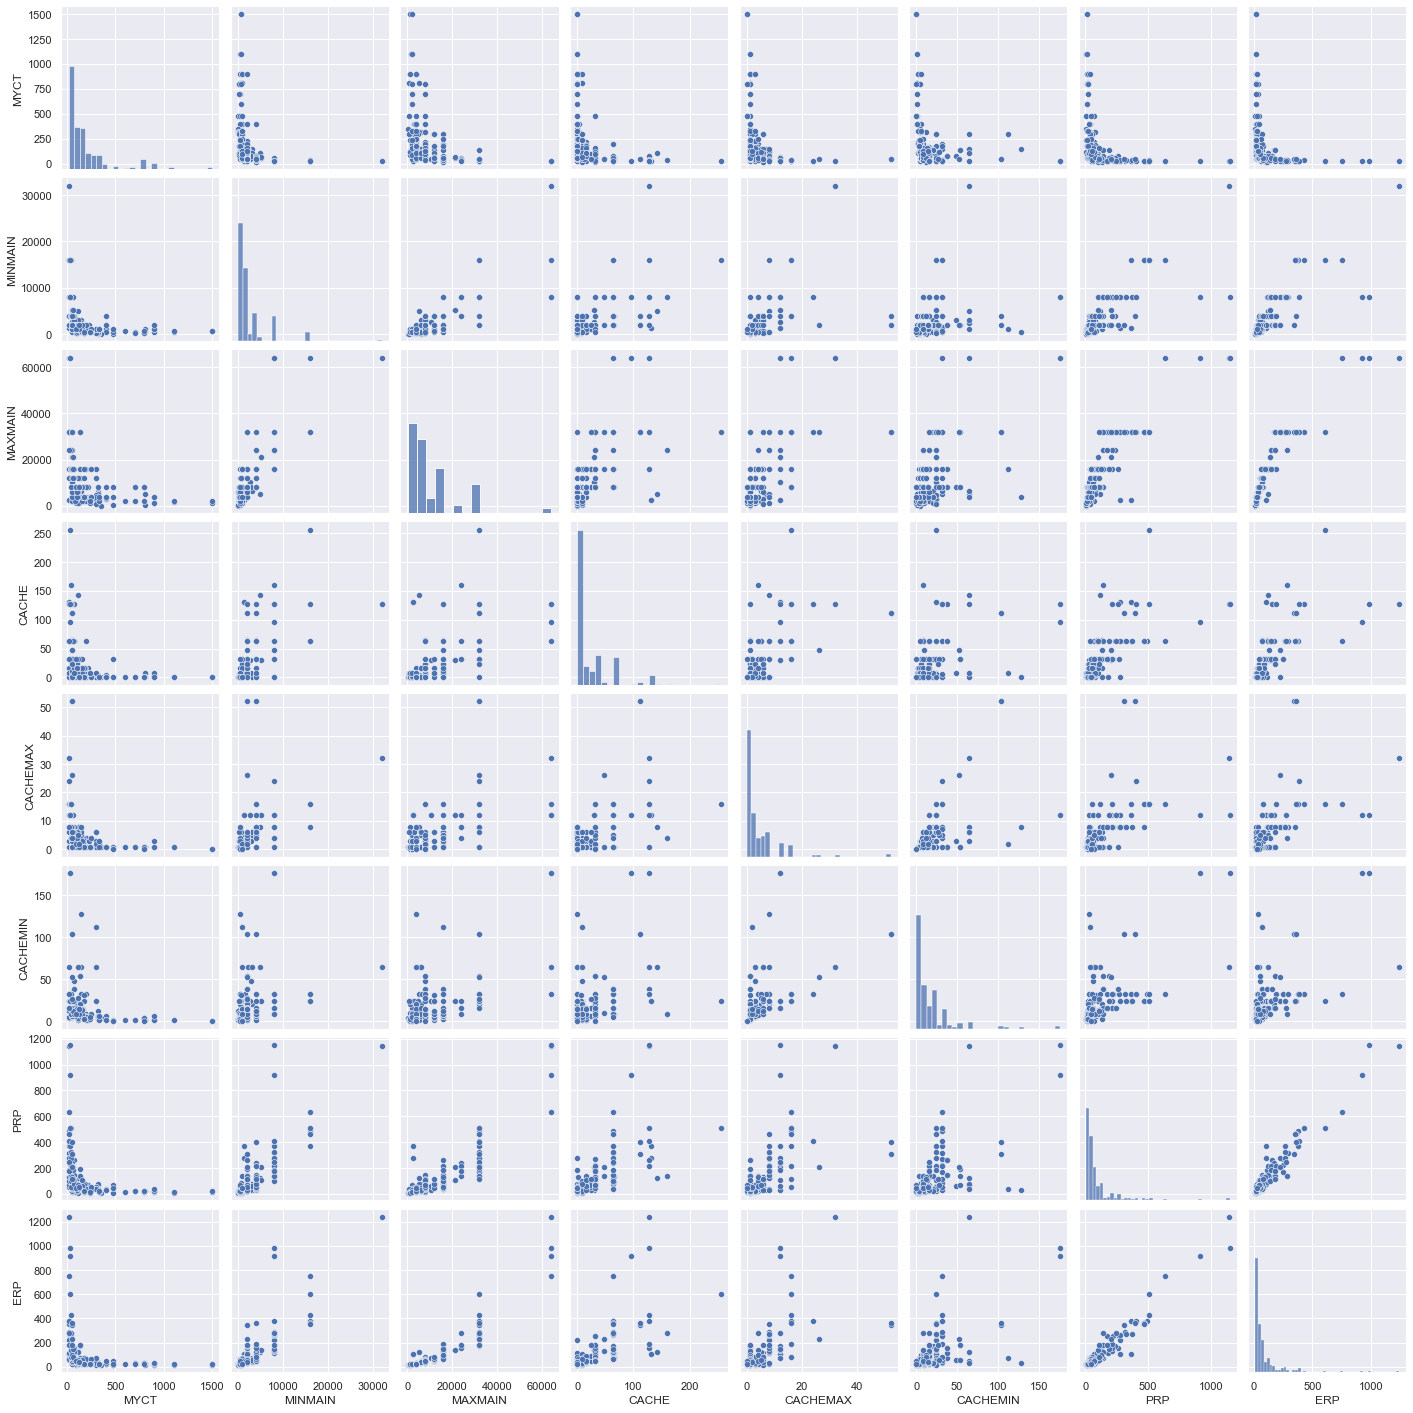

In [17]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.pairplot(machine)

In [18]:
machine.vendorname.unique()

array(['470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b', '580-5840',
       '580-5850', '580-5860', '580-5880', 'dn320', 'dn420', '7/65',
       '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780', '3000/3

In [19]:
machine.modelname.unique()

array(['amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d', 'cdc',
       'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould', 'hp',
       'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [20]:
y = machine.pop('ERP')

In [21]:
x = machine.drop(['vendorname', 'modelname'], axis=1)

In [22]:
x.shape

(208, 7)

In [23]:
x.head()

,MYCT,MINMAIN,MAXMAIN,CACHE,CACHEMAX,CACHEMIN,PRP
0,29,8000,32000,32,8,32,269
1,29,8000,32000,32,8,32,220
2,29,8000,32000,32,8,32,172
3,29,8000,16000,32,8,16,132
4,26,8000,32000,64,8,32,318


In [24]:
y.shape

(208,)

In [25]:
# x[['MYCT', 'MINMAIN', 'MAXMAIN', 'CACHE', 'CACHEMAX', 'CACHEMIN', 'PRP']] = StandardScaler().fit_transform(x[['MYCT', 'MINMAIN', 'MAXMAIN', 'CACHE', 'CACHEMAX', 'CACHEMIN', 'PRP']])

In [26]:
xtr, xts, ytr, yts = train_test_split(x,y,train_size = 0.2)

In [27]:
regressor = SVR(kernel = 'rbf')
regressor.fit(xtr, ytr)

SVR()

In [28]:
pred = regressor.predict(xts)
mean_squared_error(pred, yts)

26530.181387739445

In [29]:
# 26530.181387739445 - Without Scaling
# 23221.717172160057 - With Scaling
